In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns




# **All you need to knew About California Housing Dataset**
1. **MedInc (Median Income)**
   - Represents the median income of households in the block
   - Measured in tens of thousands of US Dollars ($10,000)
   - Example: A value of 8.3252 means $83,252

2. **HouseAge**
   - Median age of houses in the block
   - Measured in years
   - Can help assess property depreciation/appreciation patterns
   - Example: A value of 41.0 means houses are 41 years old

3. **AveRooms**
   - Average number of rooms per household in the block
   - Calculated as total rooms / total households
   - Includes all rooms (not just bedrooms)
   - Example: 6.984127 means about 7 rooms per household

4. **AveBedrms**
   - Average number of bedrooms per household in the block
   - Calculated as total bedrooms / total households
   - Example: 1.023810 means about 1 bedroom per household

5. **Population**
   - Total number of people living in the block
   - Represents the block's population
   - Example: 322.0 means 322 people live in the block

6. **AveOccup**
   - Average number of household members
   - Calculated as population / total households
   - Indicates household density
   - Example: 2.555556 means about 2.6 people per household

7. **Latitude**
   - Geographic coordinate specifying north-south position
   - Measured in degrees
   - Higher values indicate more northern locations in California
   - Example: 37.88 indicates a location in northern California

8. **Longitude**
   - Geographic coordinate specifying east-west position
   - Measured in degrees
   - Negative values indicate locations in the Western hemisphere
   - Example: -122.23 indicates a location on the West Coast

9. **Target (MedianHouseValue)**
   - Median house value for houses in the block
   - Measured in hundreds of thousands of dollars($100,000)

   - This is what we're trying to predict
   - Example: A value of 4.526 means $452,600

Important Notes:
- All values are from the 1990 census
- The data is aggregated by block groups
- A block group typically contains 600 to 3,000 people
- Geographic locations (latitude/longitude) can help identify proximity to urban areas, coast, etc.
- Income and house values are not adjusted for inflation (they reflect 1990 prices)

The dataset is particularly useful for:
- Studying housing market patterns
- Understanding demographic influences on house prices
- Analyzing geographic factors in property values
- Practicing regression problems with real-world data


In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Display basic information about the dataset
print("Dataset Features:", housing.feature_names)
print("Dataset Shape:", X.shape)
print("\nFeature Description:")
print(pd.DataFrame(housing.data, columns=housing.feature_names).describe())

print("\ntarget:",housing.target_names)
print("Target Shape:", y.shape)
print("\nTarget Description:")
print(pd.Series(housing.target, name=housing.target_names[0]).describe())

Dataset Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset Shape: (20640, 8)

Feature Description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655    

In [3]:

# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())



Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


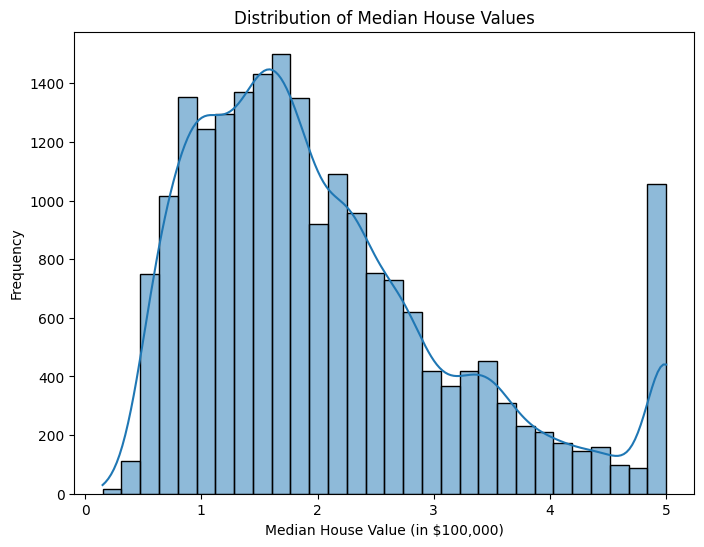

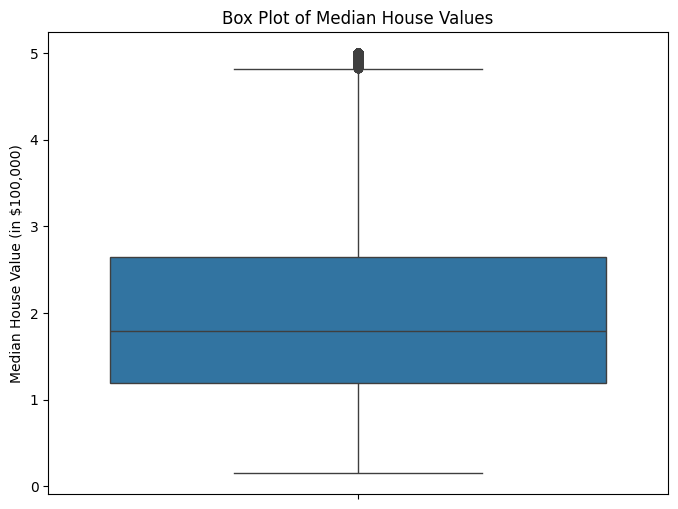

In [4]:

#'y' contains the target variable (MedianHouseValue)
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Frequency')
plt.show()

# use a box plot to visualize the range and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Box Plot of Median House Values')
plt.ylabel('Median House Value (in $100,000)')
plt.show()

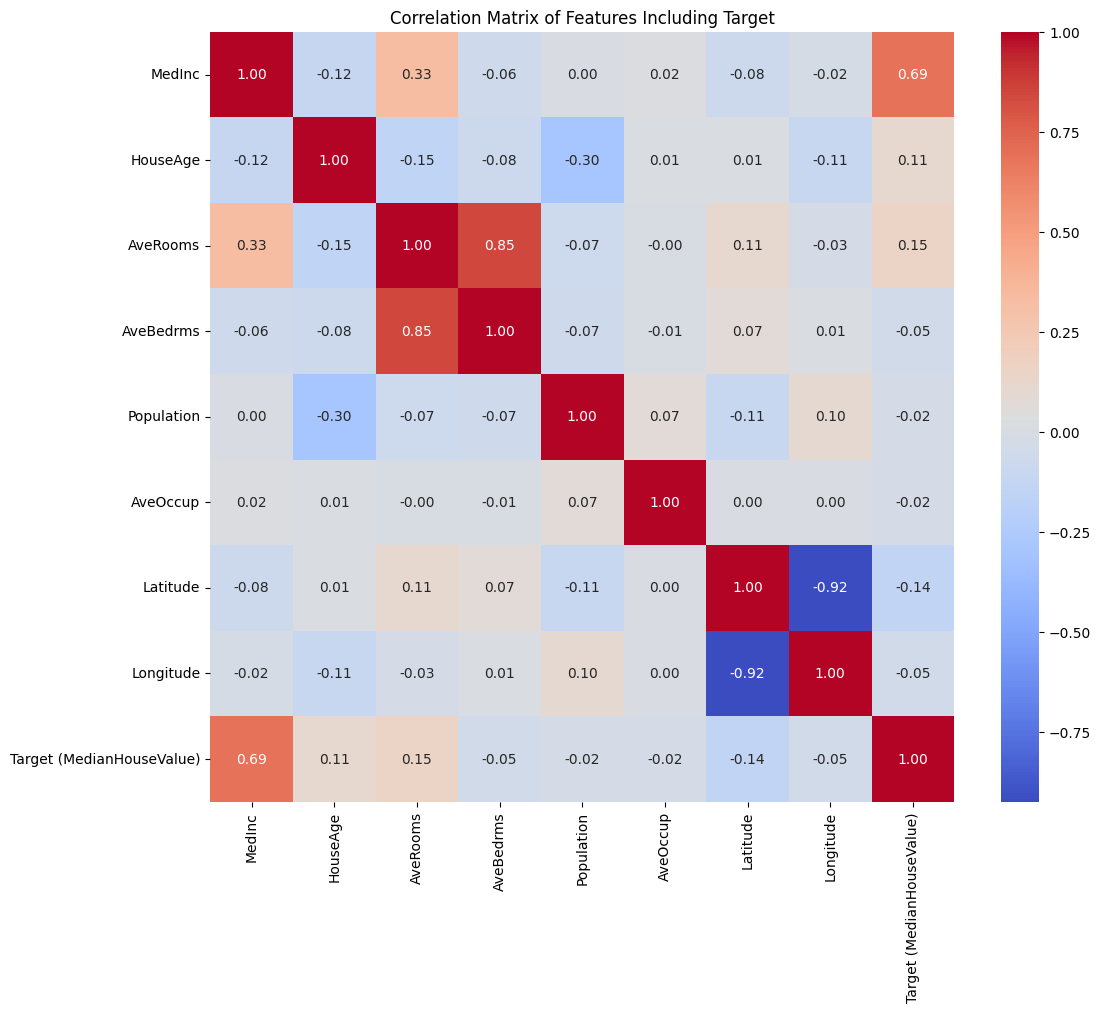

In [5]:

Data=X.copy()
# Add target variable to the dataframe for visualization
Data['Target (MedianHouseValue)'] = y

# Calculate the correlation matrix including the target
correlation_matrix_with_target = Data.corr()

# Create a heatmap of the correlation matrix including the target
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features Including Target')
plt.show()

In [7]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:

# Create and train the Linear Regression model
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
model.fit(X_train_scaled, y_train)


# Make predictions on test set
y_pred = model.predict(X_test_scaled)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 0.56
R-squared Score: 0.58


In [10]:

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))



Feature Importance:
      Feature  Coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308


In [11]:

# Save the model and scaler
joblib.dump(model, 'california_housing_model.joblib')
joblib.dump(scaler, 'california_housing_scaler.joblib')


['california_housing_scaler.joblib']

In [12]:

# Example of making predictions on new data
new_data = np.array([
    # MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
    [8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23],
    [5.6431, 21.0, 6.238137, 0.971880, 2401.0, 2.109842, 37.86, -122.22]
])

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = model.predict(new_data_scaled)
print("\nPredictions for new data:")
for i, pred in enumerate(predictions):
    print(f"House {i+1}: ${pred*100000:.2f}")



Predictions for new data:
House 1: $415194.31
House 2: $280680.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:

# Function to make predictions on new data
def predict_house_price(median_income, house_age, ave_rooms, ave_bedrooms,population, ave_occupants, latitude, longitude):
    # Load saved model and scaler
    loaded_model = joblib.load('california_housing_model.joblib')
    loaded_scaler = joblib.load('california_housing_scaler.joblib')

    # Prepare the input data
    input_data = np.array([[
        median_income, house_age, ave_rooms, ave_bedrooms,
        population, ave_occupants, latitude, longitude
    ]])

    # Scale the input data
    input_data_scaled = loaded_scaler.transform(input_data)

    # Make prediction
    prediction = loaded_model.predict(input_data_scaled)[0]

    return prediction * 100000  # Convert to actual price in dollars

# Example usage of the prediction function
sample_prediction = predict_house_price(
    median_income=8.3252,
    house_age=41.0,
    ave_rooms=6.984127,
    ave_bedrooms=1.023810,
    population=322.0,
    ave_occupants=2.555556,
    latitude=37.88,
    longitude=-122.23
)

print(f"\nSample prediction using the function: ${sample_prediction:.2f}")


Sample prediction using the function: $415194.31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
